In [1]:
import numpy as np
pauli = np.array([[[1,0],[0,1]], [[1,0],[0,-1]], [[0,1],[1,0]], [[0,-1j],[1j,0]]])

In [2]:
pauli

array([[[ 1.+0.j,  0.+0.j],
        [ 0.+0.j,  1.+0.j]],

       [[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]],

       [[ 0.+0.j,  1.+0.j],
        [ 1.+0.j,  0.+0.j]],

       [[ 0.+0.j, -0.-1.j],
        [ 0.+1.j,  0.+0.j]]])

In [3]:
pauli_combinations = []
for i in pauli:
    pauli_combinations.append(np.kron(i, i))

In [4]:
pauli_combinations

[array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]]),
 array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j],
        [ 0.+0.j,  0.+0.j, -1.+0.j, -0.+0.j],
        [ 0.+0.j, -0.+0.j, -0.+0.j,  1.-0.j]]),
 array([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
        [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]]),
 array([[ 0.+0.j,  0.-0.j,  0.-0.j, -1.+0.j],
        [ 0.+0.j,  0.+0.j,  1.-0.j,  0.-0.j],
        [ 0.+0.j,  1.-0.j,  0.+0.j,  0.-0.j],
        [-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])]

In [18]:
np.linalg.eig(pauli_combinations[3])[0]

array([ 1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j])

In [5]:
(-1/2*(pauli_combinations[2] + pauli_combinations[3]) + 1/2*(pauli_combinations[0] + pauli_combinations[1]))

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])

In [6]:
from qiskit import *

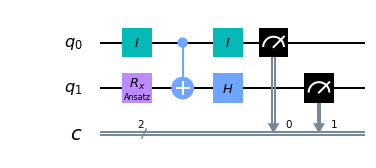

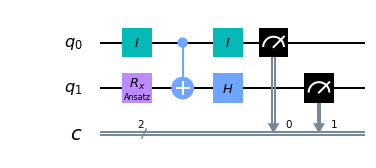

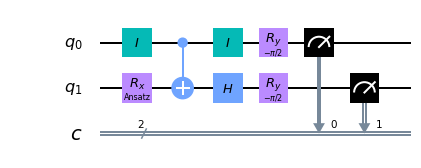

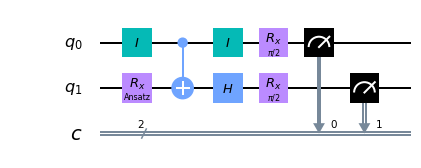

In [36]:
qc = [QuantumCircuit(2, 2) for _ in range(4)]
param = qiskit.circuit.Parameter('Ansatz')

for i in range(4):    
    qc[i].rx(param, 1)
    qc[i].i(0)
    qc[i].cx(0,1)
    qc[i].h(1)
    qc[i].i(0)

qc[2].ry(-np.pi/2, [0,1])
qc[3].rx(np.pi/2, [0,1])

for i in range(4):
    qc[i].measure([0,1],[0,1])
    display(qc[i].draw('mpl'))

#qc[i].append(ansatz_inverted_gate, [0,1])
    
#     display(qc[i].draw('mpl'))

In [37]:
eig_values = [{'00':1, '01':1, '10':1, '11':1},
              {'00':1, '01':-1, '10':-1, '11':1},
              {'00':1, '01':-1, '10':1, '11':-1},
              {'00':1, '01':-1, '10':1, '11':-1}]

In [40]:
import math
num_shots = 1000
sim = Aer.get_backend('qasm_simulator')
output = []
for i in np.linspace(0, 2*np.pi, 100):
    out = []
    for circuit in qc:
        circuit = circuit.assign_parameters({param: i})
        job = execute(circuit, sim, shots = num_shots)
        result = job.result()
        out.append(result.get_counts(circuit))
    output.append(out)
# for i in output:
#     print(i)

In [41]:
final = []
for i in output:
    out2 = []
    for j in range(4):
        avg = 0
        for key, value in i[j].items():
            avg += eig_values[j][key]*value
        out2.append(avg/num_shots)
#     print(out2)
#     print(-1/2*(out2[2] + out2[3]) + 1/2*(out2[0] + out2[1]))
    final.append(-1/2*(out2[2] + out2[3]) + 1/2*(out2[0] + out2[1]))
# print(final)
print('minimum eigenvalue = ', min(final))

minimum eigenvalue =  0.42200000000000004


In [32]:
for i in output:
    out2 = []
    for j in i:
        m = max(j.values())
#         print(j)
        for k,l in j.items():
            if l==m:
                out2.append(k)
#         print(j)
    print(out2)
    print(-1/2*(math.sqrt(int(out2[0], 2)) + math.sqrt(int(out2[1], 2))) + 1/2*(math.sqrt(int(out2[2], 2)) + (math.sqrt(int(out2[3], 2)))))
    print()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [35]:
final = []
for i in output:
    out2 = []
    for j in i:
#         m = max(j.values())
#         print(j)
        out2.append((j[0]))
#         print(j)
    print(out2)
    print(-1/2*((out2[0]) + (out2[1])) + 1/2*((out2[2]) + ((out2[3]))))
    final.append(-1/2*((out2[0]) + (out2[1])) + 1/2*((out2[2]) + ((out2[3]))))
print('minimum eigenvalue = ', min(final))

[0j, 0j, (1-6.123233995736766e-17j), 0j]
(0.5-3.061616997868383e-17j)
[0j, 0j, (1-1.0048465142446202e-16j), 0j]
(0.5-5.024232571223101e-17j)
[0j, 0j, (1-1.0048465142446203e-16j), 0j]
(0.5-5.0242325712231017e-17j)
[0j, 0j, (1-1.3973696289155642e-16j), 0j]
(0.5-6.986848144577821e-17j)
[0j, 0j, (1-6.123233995736766e-17j), 0j]
(0.5-3.061616997868383e-17j)
[0j, 0j, (1-6.123233995736769e-17j), 0j]
(0.5-3.061616997868384e-17j)
[0j, 0j, (1+1.7272282976821083e-17j), 0j]
(0.5+8.636141488410541e-18j)
[0j, 0j, (1-2.1980028490273303e-17j), 0j]
(0.5-1.0990014245136651e-17j)
[0j, 0j, (1-6.123233995736767e-17j), 0j]
(0.5-3.0616169978683836e-17j)
[0j, 0j, (1-6.123233995736766e-17j), 0j]
(0.5-3.061616997868383e-17j)
[0j, 0j, (1-1.0048465142446202e-16j), 0j]
(0.5-5.024232571223101e-17j)
[0j, 0j, (1-6.123233995736767e-17j), 0j]
(0.5-3.0616169978683836e-17j)
[0j, 0j, (1-6.123233995736766e-17j), 0j]
(0.5-3.061616997868383e-17j)
[0j, 0j, (1-6.123233995736766e-17j), 0j]
(0.5-3.061616997868383e-17j)
[0j, 0j, (

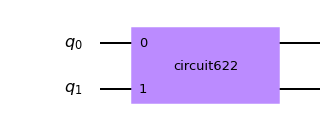

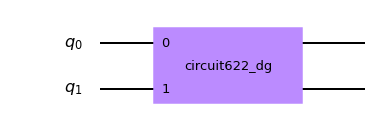

[[-8.65956056e-17+0.j  0.00000000e+00-0.j  0.00000000e+00+0.j
   0.00000000e+00-0.j]
 [ 0.00000000e+00-0.j  0.00000000e+00+0.j  0.00000000e+00-0.j
  -8.65956056e-17+0.j]
 [ 1.73191211e-16+0.j  0.00000000e+00-0.j -8.65956056e-17+0.j
   0.00000000e+00-0.j]
 [ 0.00000000e+00-0.j -8.65956056e-17+0.j  0.00000000e+00-0.j
   1.73191211e-16+0.j]]


In [28]:
param = qiskit.circuit.Parameter('Ansatz')


p = np.pi
qc = QuantumCircuit(2)
qc.h(1)
qc.i(0)
qc.cx(0,1)
qc.rx(param, 1)
qc.i(0)
# display(qc1.draw('mpl'))


gate_original = qc.to_gate()
qc1 = QuantumCircuit(2)
qc1.append(gate_original, [0,1])
qc1 = qc1.assign_parameters({param: p})
display(qc1.draw('mpl'))

# qc = qc.assign_parameters({param: i})
# sim = Aer.get_backend('unitary_simulator')
# result = execute(qc, sim).result()
# unit0 = result.get_unitary()


sim = Aer.get_backend('unitary_simulator')
result = execute(qc1, sim).result()
unit = result.get_unitary()

# qc2 = QuantumCircuit(2)
# qc2.rx(np.pi, 1)
# qc2.i(0)
# qc2.cx(0,1)
# qc2.h(1)
# qc2.i(0)
# display(qc2.draw('mpl'))

# result = execute(qc2, sim).result()
# unit2 = result.get_unitary()

# qc3 = QuantumCircuit(2)
# qc3.h(0)
# qc3.i(1)
# qc3.cx(1,0)
# qc3.rx(np.pi, 0)
# qc3.i(1)
# display(qc3.draw('mpl'))
# result = execute(qc3, sim).result()
# unit3 = result.get_unitary()

# qc4 = QuantumCircuit(2)
# qc4.rx(np.pi, 0)
# qc4.i(1)
# qc4.cx(1,0)
# qc4.h(0)
# qc4.i(1)
# display(qc4.draw('mpl'))

# result = execute(qc4, sim).result()
# unit4 = result.get_unitary()

gate_inverted = gate_original.inverse()
qc5 = QuantumCircuit(2)
qc5.append(gate_inverted, [0,1])
qc5 = qc5.assign_parameters({param: p})
display(qc5.draw('mpl'))
result = execute(qc5, sim).result()
unit5 = result.get_unitary()

# qc6 = QuantumCircuit(2)
# qc6.append(gate_inverted, [0,1])
# qc6.append(gate_original, [0,1])
# qc6 = qc6.assign_parameters({param: i})
# display(qc6.draw('mpl'))
# result = execute(qc6, sim).result()
# unit6 = result.get_unitary()


# print(np.subtract(unit, unit0))
# print(np.round(unit6))
# print(unit)

# print()
# print(np.round(unit2))
# print()
# print(np.round(unit3))
# print()
# print(np.round(unit4))

# print()
# print((unit5))
# print()
print(np.subtract((np.conj(unit.T)), unit5))

In [77]:
import numpy as np
np.linalg.eigh(np.array([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
                        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
                        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
                        [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]]))

(array([-1., -1.,  1.,  1.]),
 array([[-0.70710678+0.j, -0.        +0.j,  0.        +0.j,
         -0.70710678+0.j],
        [ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
          0.        +0.j],
        [ 0.        +0.j, -0.70710678+0.j, -0.70710678+0.j,
          0.        +0.j],
        [ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         -0.70710678+0.j]]))

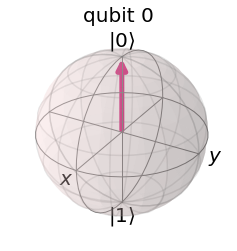

In [97]:
from qiskit.tools.visualization import plot_bloch_multivector
qc = QuantumCircuit(1)
qc.ry(np.pi/2, 0)
qc.ry(-np.pi/2, 0)
# qc.ry(np.pi/2, 0)

sim = Aer.get_backend('statevector_simulator')
result = execute(qc, sim).result()
plot_bloch_multivector(result.get_statevector())

In [98]:
#measuring in x basis:
'''
qc.ry(-np.pi/2, 0)
'''
#measuring in y basis:
'''
qc.rx(np.pi/2, 0)
'''

'\nqc.rx(np.pi/2, 0)\n'

In [107]:
for i in range(4):
    print(np.linalg.eig(pauli_combinations[i])[0])

[1.+0.j 1.+0.j 1.+0.j 1.+0.j]
[ 1.+0.j -1.+0.j -1.+0.j  1.-0.j]
[ 1.+0.j -1.+0.j  1.+0.j -1.+0.j]
[ 1.+0.j -1.+0.j  1.+0.j -1.+0.j]


In [102]:
np.multiply(pauli_combinations[0], pauli_combinations[1])

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j, -0.+0.j],
       [ 0.+0.j, -0.+0.j, -0.+0.j,  1.+0.j]])

In [111]:
np.linalg.eig(np.kron(pauli[1], pauli[0]))[0]

array([ 1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j])